# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. import data

In [2]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [10]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [4]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# 將ID以外的特徵全取出
X = df.iloc[:, 1:] 

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [12]:
# 顯示各特徵的平均與標準差
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81


In [13]:
# 前5大主成分各自解釋數值的變異
from sklearn.decomposition import PCA
import numpy as np

pca_5d = PCA(5, random_state=123)
pca_5d.fit(Z_sk)
np.round(pca_5d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06])

In [ ]:
sum(pca_5d.explained_variance_ratio_.tolist()[:2]) # 前5大主成分就已解釋了數值中近6成的差異

0.6194725095733014

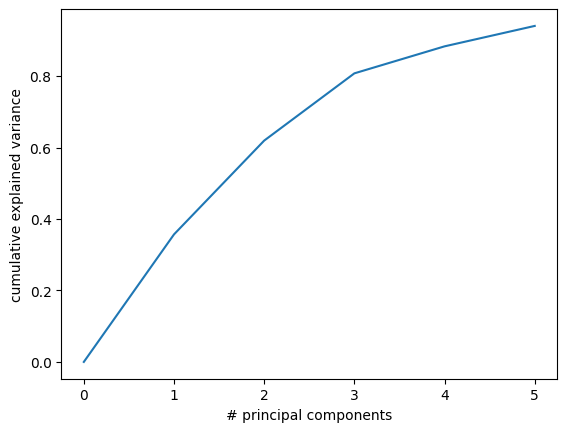

In [18]:
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_5d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [19]:
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(Z_sk)

In [20]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
第一主成分,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
第二主成分,0.46,0.51,0.31,0.64,0.12,0.015,-0.07


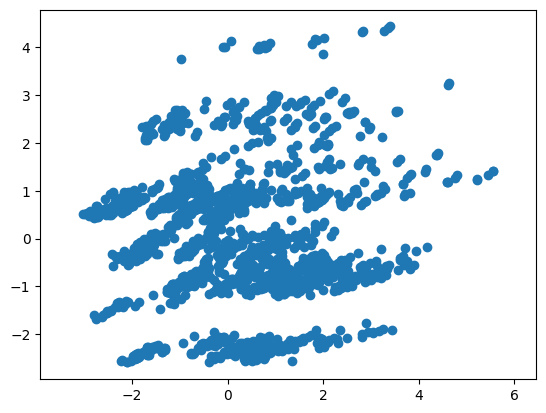

In [21]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal');